<a href="https://colab.research.google.com/github/trived76/ECE1512-Homework2-Maharshi/blob/master/ECE1512_HOMEWORK2_by_MAHARSHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding the effect of convolution operation of a filter


(-0.5, 1191.5, 499.5, -0.5)

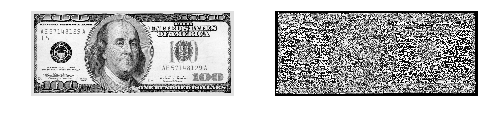

In [47]:
import cv2
img_temp=cv2.imread('filter_edge.tif', -cv2.IMREAD_ANYDEPTH)
k = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

from scipy import ndimage
import matplotlib.pyplot as plt
after_convol=ndimage.convolve(img_temp, k)
plt.subplot(1,2,1)
plt.imshow(img_temp,cmap="Greys_r")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(after_convol,cmap="Greys_r")
plt.axis('off')

# Lucid Modelzoo

If you want to study techniques for visualizing and understanding neural networks, it's important to be able to try your experiments on multiple models.

 [Lucid](https://github.com/tensorflow/lucid) is a library for visualizing neurla networks.
 As of lucid v0.3, we provide a consistent API for interacting with 27 different vision models.



## General Setup

In [1]:
# Expanded modelzoo is only available as of lucid v0.3
!pip install --quiet lucid==0.3

import numpy as np
import tensorflow as tf

from lucid.misc.io import show, load
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

    100% |████████████████████████████████| 51kB 4.5MB/s 


## Import Modelzoo

In [0]:
# Lucid's modelzoo can be accessed as classes in vision_models
import lucid.modelzoo.vision_models as models

# ... or throguh a more systematic factory API
import lucid.modelzoo.nets_factory as nets

## List Models

As of lucid v0.3

In [0]:
print ""
print "Model".ljust(27), " ", "Dataset"
print ""
for name, Model in nets.models_map.iteritems():
  print name.ljust(27), " ", Model.dataset


Model                         Dataset

PnasnetMobile_slim            ImageNet
PnasnetLarge_slim             ImageNet
InceptionV1_caffe_Places365   Places365
MobilenetV1_025_slim          ImageNet
AlexNet_caffe_Places365       Places365
NasnetMobile_slim             ImageNet
InceptionV2_slim              ImageNet
ResnetV1_101_slim             ImageNet
InceptionV1_caffe             ImageNet
InceptionResnetV2_slim        ImageNet
InceptionV3_slim              ImageNet
InceptionV1_caffe_Places205   Places205
InceptionV1_slim              ImageNet
ResnetV1_50_slim              ImageNet
CaffeNet_caffe                ImageNet
InceptionV4_slim              ImageNet
VGG19_caffe                   ImageNet
ResnetV1_152_slim             ImageNet
MobilenetV1_050_slim          ImageNet
NasnetLarge_slim              ImageNet
AlexNet                       ImageNet
ResnetV2_101_slim             ImageNet
ResnetV2_152_slim             ImageNet
MobilenetV1_slim              ImageNet
VGG16_caffe          

## List Model Layers

In [48]:
# Let's import a model from the Lucid modelzoo!

model = models.InceptionV1()
model.load_graphdef()

models.InceptionV1.layers


[{'name': 'conv2d0', 'size': 64, 'type': 'conv'},
 {'name': 'conv2d1', 'size': 64, 'type': 'conv'},
 {'name': 'conv2d2', 'size': 192, 'type': 'conv'},
 {'name': 'mixed3a', 'size': 256, 'type': 'conv'},
 {'name': 'mixed3b', 'size': 480, 'type': 'conv'},
 {'name': 'mixed4a', 'size': 508, 'type': 'conv'},
 {'name': 'mixed4b', 'size': 512, 'type': 'conv'},
 {'name': 'mixed4c', 'size': 512, 'type': 'conv'},
 {'name': 'mixed4d', 'size': 528, 'type': 'conv'},
 {'name': 'mixed4e', 'size': 832, 'type': 'conv'},
 {'name': 'mixed5a', 'size': 832, 'type': 'conv'},
 {'name': 'mixed5b', 'size': 1024, 'type': 'conv'},
 {'name': 'head0_bottleneck', 'size': 128, 'type': 'conv'},
 {'name': 'nn0', 'size': 1024, 'type': 'dense'},
 {'name': 'softmax0', 'size': 1008, 'type': 'dense'},
 {'name': 'head1_bottleneck', 'size': 128, 'type': 'conv'},
 {'name': 'nn1', 'size': 1024, 'type': 'dense'},
 {'name': 'softmax1', 'size': 1008, 'type': 'dense'},
 {'name': 'softmax2', 'size': 1008, 'type': 'dense'}]

## Show Model Graph

In [30]:
model = models.InceptionV1()
model.load_graphdef()

model.show_graph()

## Visualize Neuron

See the [lucid tutorial](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb) to learn more.

We pick `InceptionV4/InceptionV4/Mixed_6b/concat` from above, and chose to focus on unit 0.

512 1333.1011



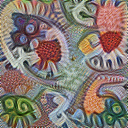

In [53]:
# Visualizing a neuron is easy!

_ = render.render_vis(model, "mixed4a_pre_relu:476")

## Caricature

See the [inversion and caricature notebook](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/misc/feature_inversion_caricatures.ipynb) to learn more.


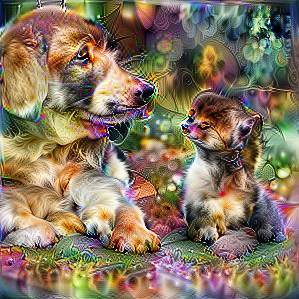

None


In [0]:
from lucid.recipes.caricature import feature_inversion

img = load("https://storage.googleapis.com/lucid-static/building-blocks/examples/dog_cat.png")

model = models.InceptionV4_slim()
model.load_graphdef()

result = feature_inversion(img, model, "InceptionV4/InceptionV4/Mixed_6b/concat", n_steps=512, cossim_pow=0.0)
show(result)